<a href="https://colab.research.google.com/github/Maxime-Bakunzi/data_preprocessing_ml/blob/main/ml_pipeline_Maxime_Bakunzi_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: **Analysis of Student Scores and Performance Prediction**
## [Company Logo]

## Student Name: **Maxime Guy Bakunzi**

---

### **1. Data Sources and Aggregation**

#### **Sources of Data**:
1. **Dataset**:
   - A CSV file containing student scores and other features, I used in the *Introduction to Machine Learning Summative* project.
   `https://www.kaggle.com/datasets/markmedhat/student-scores`
2. **Other sources of data**:
   - There are other sources of data that you can use to find data to use in your project. such as:
    - UCI Machine Learning Repository
     `https://archive.ics.uci.edu/dataset/467/student+academics+performance`
    - Data.Gov (USA related data)
      `https://catalog.data.gov/dataset/school-quality-reports-data`
    - IEEE Dataport
      `https://ieee-dataport.org/documents/students-performance-scores`

#### **Data Aggregation**:
For this project, aggregation from multiple sources isn’t required, as the dataset contains comprehensive features for analysis and modeling. However, future iterations could benefit from additional datasets to explore regional or demographic trends in education.



---
**Dataset visualization**

In [10]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/MyModels/student-scores.csv')
data.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76




---

### **2. Data Format Transformation**

#### **Current Format**:
The dataset is a structured CSV file containing 2,000 rows and 17 columns.

#### **Planned Transformation**:
1. Drop redundant columns (e.g., `first_name`, `last_name`, and `email`) that are irrelevant for analysis.
2. Encode categorical variables (e.g., `gender`, `career_aspiration`).
3. Normalize numerical columns like `absence_days` and `weekly_self_study_hours` for modeling.
4. Handle outliers and missing data (if found during EDA).

---

### **3. Data Exploration**

#### **Features in the Dataset**:
- Numerical: Scores in subjects, `absence_days`, `weekly_self_study_hours`.
- Categorical: `gender`, `career_aspiration`, `part_time_job`.

#### **EDA Summary**:
1. Distribution of scores across subjects.
2. Correlations between features.
3. Identification of potential outliers in numerical features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

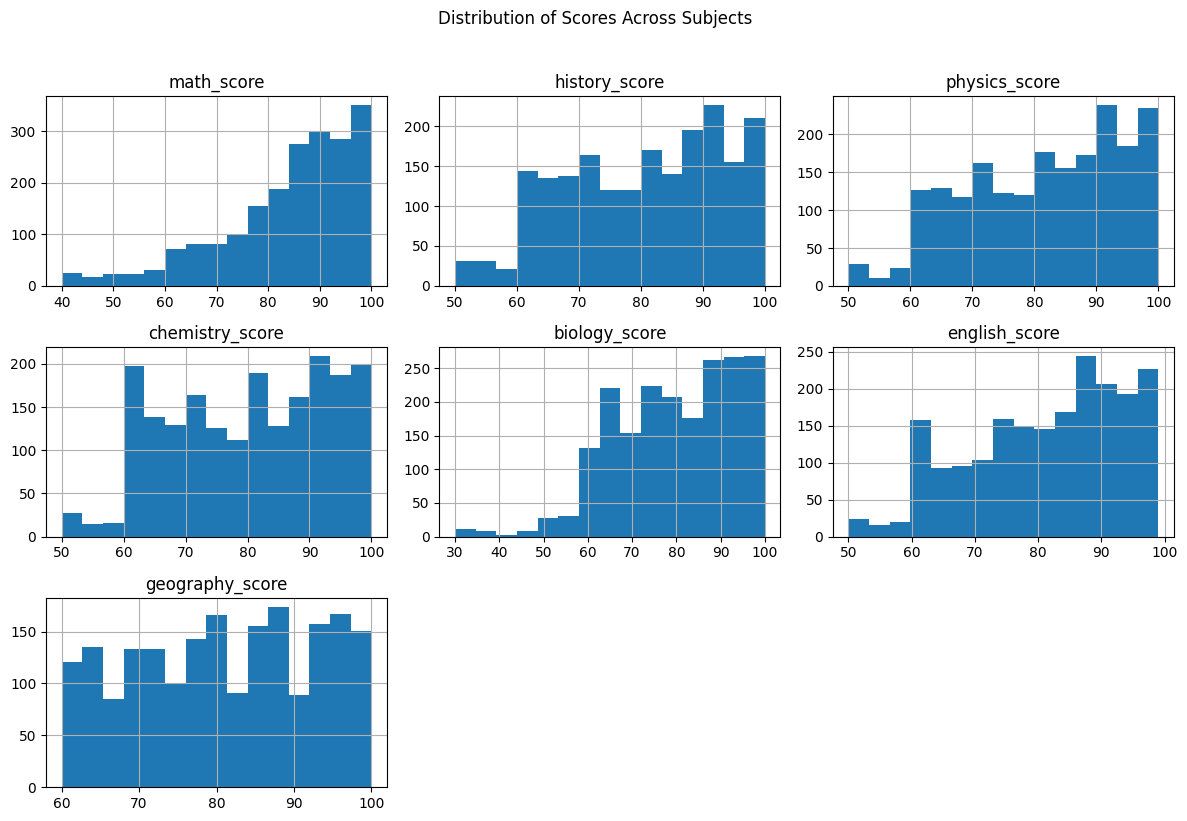

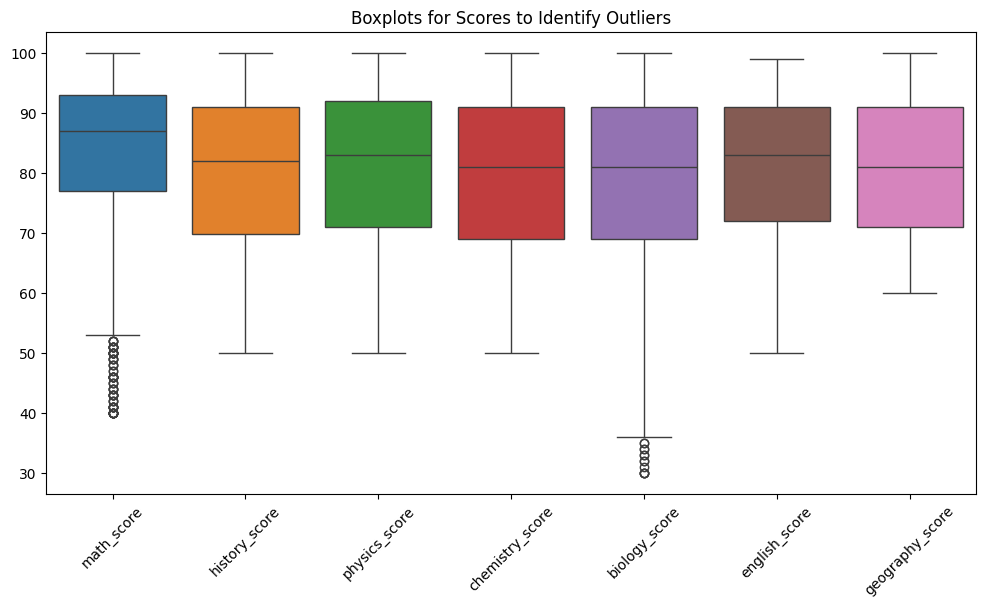

In [19]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MyModels/student-scores.csv')

# Summarize the dataset
print(df.info())
print(df.describe())

# Visualize score distributions
subjects = ['math_score', 'history_score', 'physics_score',
            'chemistry_score', 'biology_score', 'english_score', 'geography_score']

df[subjects].hist(figsize=(12, 8), bins=15)
plt.suptitle('Distribution of Scores Across Subjects', y=1.02)
plt.tight_layout()
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[subjects])
plt.title('Boxplots for Scores to Identify Outliers')
plt.xticks(rotation=45)
plt.show()



---

### **4. Hypothesis Testing**

#### **Hypotheses**:
1. Students with part-time jobs have lower average scores than those without.
2. Weekly self-study hours positively correlate with overall scores.

#### **Methodology**:
- Use t-tests to compare scores of students with and without part-time jobs.
- Compute Pearson/Spearman correlation coefficients to validate relationships.


---

### **5. Handling Sparse/Dense Data and Outliers**



#### **Steps**:
- 1. Check for missing data:


In [20]:
print(df.isnull().sum())

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


- 2. Handle outliers using the IQR method:

In [21]:
Q1 = df[subjects].quantile(0.25)
Q3 = df[subjects].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[subjects] < (Q1 - 1.5 * IQR)) | (df[subjects] > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers per subject:\n{outliers}")


Outliers per subject:
math_score         70
history_score       0
physics_score       0
chemistry_score     0
biology_score      13
english_score       0
geography_score     0
dtype: int64


---

### **6. Data Splitting**

#### **Methodology**:
- Split into 70% training, 15% validation, and 15% testing sets using `train_test_split` from scikit-learn.

---

### **7. Bias Mitigation**

#### **Techniques**:
- Stratify the splits based on `gender` or `career_aspiration` to ensure representation.




---

### **8. Features for Model Training**

#### **Steps**:
1. Rank features using correlation heatmaps and domain knowledge.
2. Select features like scores and study hours for training.


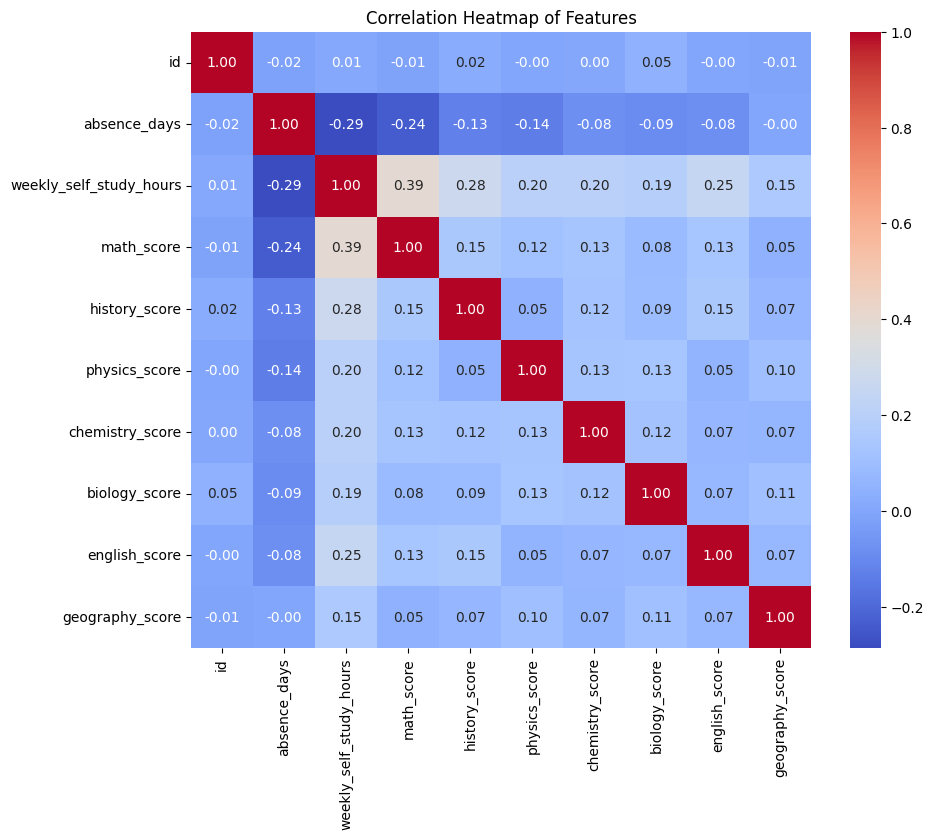

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


---

### **9. Types of Data Handling**

#### **Data Types**:
- **Categorical**: Encode `gender`, `career_aspiration`.
- **Numerical**: Normalize scores and study hours.



---

### **10. Data Transformation for Modeling**

#### **Steps**:
1. Apply Min-Max Scaling or Standardization to numerical data.
2. Use one-hot encoding for categorical variables.


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define transformations
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

# Apply transformations
df_transformed = df.copy()
df_transformed[subjects] = scaler.fit_transform(df_transformed[subjects])
df_transformed = pd.get_dummies(df_transformed, columns=['gender', 'career_aspiration'], drop_first=True)
df_transformed.head()

,id,first_name,last_name,email,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,...,career_aspiration_Game Developer,career_aspiration_Government Officer,career_aspiration_Lawyer,career_aspiration_Real Estate Developer,career_aspiration_Scientist,career_aspiration_Software Engineer,career_aspiration_Stock Investor,career_aspiration_Teacher,career_aspiration_Unknown,career_aspiration_Writer
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,False,3,False,27,-0.790525,0.052463,...,False,False,True,False,False,False,False,False,False,False
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,False,2,False,47,0.495250,0.445147,...,False,False,False,False,False,False,False,False,False,False
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,False,9,True,13,-0.185454,1.309054,...,False,True,False,False,False,False,False,False,False,False
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,False,5,False,3,-0.941792,-0.497296,...,False,False,False,False,False,False,False,False,False,False
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,False,5,False,10,0.041447,-0.261685,...,False,False,False,False,False,False,False,False,True,False


### **11. Data Storage**

#### **Plan**:
Processed data will be stored locally in a CSV format for accessibility. But for long-term storage, I may consider cloud-based options like Google Cloud, AWS S3 or others.
